In [ ]:
!jt -l

In [2]:
import os
import imp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sys
import pickle
import matplotlib.ticker as plticker

#os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
#lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py') 

sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi
sys.path.append(os.path.dirname('/media/lucas/datam01/LucasLobo/RessonanceRIng')) #Current directory

from jupyterthemes import jtplot

jtplot.style(theme='onedork', context='notebook', ticks=True, grid=True)

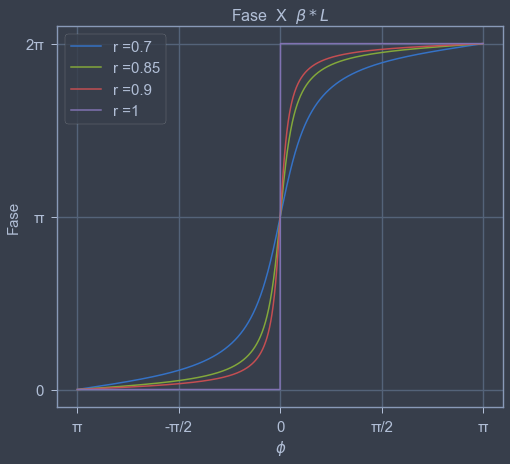

In [77]:
f,ax=plt.subplots(1)

neff = 2.270316
comprimento = np.linspace(1535e-9,1560e-9,1000)
r = 0.85
a = 1
k = np.sqrt(1- r**2)
L = 20e-6
beta = neff*2*np.pi/comprimento
phi = beta*L
phi = np.linspace(-np.pi,np.pi,1000)
fase = np.pi + phi +np.arctan((r*np.sin(phi))/(a-r*np.cos(phi))) + np.arctan((a*r*np.sin(phi))/(1-r*a*np.cos(phi)))
T = (a**2 - 2*r*a*np.cos(phi) + r**2)/(1 - 2*a*r*np.cos(phi)+(r*a)**2)
#plt.plot(comprimento,T)
rs = [0.7,0.85,0.9,1]
for x in range(4):
    r = rs[x]
    fase = np.pi + phi +np.arctan((r*np.sin(phi))/(a-r*np.cos(phi))) + np.arctan((a*r*np.sin(phi))/(1-r*a*np.cos(phi)))
    ax.plot(phi,fase,label='r ={}'.format(r))
    ax.legend(fontsize=15)
ax.set_title(r'Fase  X  $\beta*L$',fontsize=16)
ax.set_xlabel(r'$\phi$',fontsize=15)
ax.set_ylabel('Fase',fontsize=15)
ax.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],['π', '-π/2', '0', 'π/2', 'π'],fontsize=15)
ax.set_yticks([0,np.pi,2*np.pi],[0,'π','2π'],fontsize=15)



Text(0.5, 1.0, 'Transmissão X $\\lambda$, All-pass ring, a = 0.9, r = 0.85')

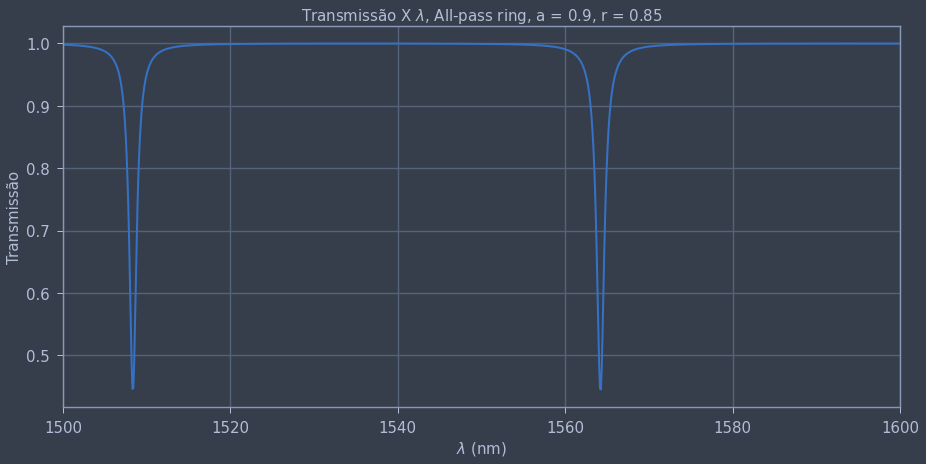

In [49]:

plt.rcParams["figure.figsize"] = (15,7)
neff = 2.250316
comprimento = np.linspace(1500e-9,1600e-9,1000)
r = np.sqrt(0.9050512270620459)
a = 0.99
k = np.sqrt(1- r**2)
L = 18.7680e-6
beta = neff*2*np.pi/comprimento
phi = beta*L
T = (a**2 - 2*r*a*np.cos(phi) + r**2)/(1 - 2*a*r*np.cos(phi)+(r*a)**2)
plt.plot(comprimento*1e9,T,linewidth=2)
plt.xlim(1500,1600)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Transmissão',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title(r'Transmissão X $\lambda$, All-pass ring, a = 0.9, r = 0.85',fontsize =15)


Text(0.5, 1.0, 'Transmissão X $\\lambda$, Add-Drop ring, a = 1, r = 0.9')

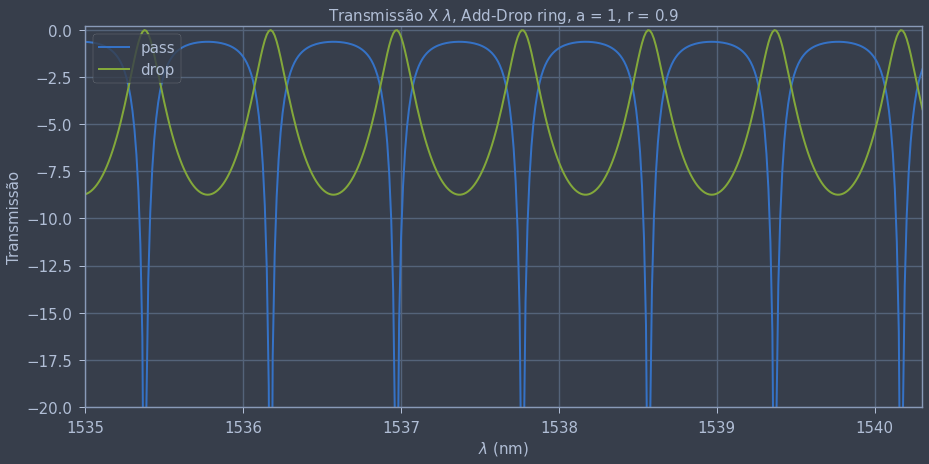

In [81]:
plt.rcParams["figure.figsize"] =(15,7)
neff = 2.275402
comprimento = np.linspace(1535e-9,1560e-9,2000)
r1 = np.sqrt(0.46463823284128913)
r2 = np.sqrt(0.46463823284128913)
a = 1
k = np.sqrt(1- r**2)
L = 650.817815e-6
beta = neff*2*np.pi/comprimento
phi = beta*2*L


Tpteo = (r2**2*a**2 - 2*r1*r2*a*np.cos(phi)+r1**2)/(1-2*r1*r2*a*np.cos(phi)+(r1*r2*a)**2)
Tdteo = ((1-r1*r1)*(1-r2*r2)*a)/(1-2*r1*r2*a*np.cos(phi)+(r1*r2*a)**2)
plt.plot(comprimento*1e9,10*np.log10(Tpteo),linewidth=2)
plt.plot(comprimento*1e9,10*np.log10(Tdteo),linewidth=2)

plt.xlim(1535,1540.3)
plt.ylim(-20,0.2)
plt.legend(['pass','drop'],loc='upper left',fontsize =15)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Transmissão',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title(r'Transmissão X $\lambda$, Add-Drop ring, a = 1, r = 0.9',fontsize =15)

In [57]:
mode = lumapi.MODE(filename= 'Ressonance 1.lms')


In [50]:
Lambda = 1547.5e-9
neff = 2.275402
ng = 4.606396
dn = 2.291656 - 2.264940
gap = 150e-9

fsr = Lambda**2*100e9/299792458 
FWHW = Lambda**2*25e9/299792458 


L= Lambda**2/(fsr*ng)
beta = neff*2*np.pi/Lambda
finesse = fsr/FWHW 

Q = Lambda/FWHW

r = np.sqrt((ng*L*np.pi/(2*Q*Lambda))**2 + 1)- ng*L*np.pi/(2*Q*Lambda)
k = np.sqrt(1-r**2)


comprimentoacoplamento = (Lambda/(np.pi*dn))*np.arcsin(k)
#comprimentoacoplamento = 20*comprimentoacoplamento

raio = (L-2*comprimentoacoplamento)/(2*np.pi)

print('FSR = {} nm'.format(fsr*1e9))
print('FWHW = {} nm'.format(FWHW*1e9))
print('Transmissao teorica porta pass em 1550 = {}'.format(r**2))
print('Transmissao teorica porta drop em 1550 = {}'.format(k**2))
print('Comprimento do anel = {} um'.format(L*1e6))
print('Raio = {} um'.format(raio*1e6))
print('Comprimento teorico de acoplamento = {} um'.format(comprimentoacoplamento*1e6))

mode.setnamed('ring resonator','radius',raio)
mode.setnamed('ring resonator','Lc',comprimentoacoplamento)
mode.setnamed('ring resonator','gap',gap)

mode.select('ring resonator::outer_top')

polos = mode.get('poles')
y = polos[0,1]

mode.setnamed('source','y',y)
mode.setnamed('pass','y',y)
mode.setnamed('drop','y',-y)
mode.setnamed('mesh1','y',y - gap/2 - 0.45e-6/2)
mode.setnamed('mesh2','y',-(y - gap/2 - 0.45e-6/2))
mode.setnamed('varFDTD','y0',y)


FSR = 0.7988047017513695 nm
FWHW = 0.19970117543784238 nm
Transmissao teorica porta pass em 1550 = 0.46463823284128913
Transmissao teorica porta drop em 1550 = 0.5353617671587109
Comprimento do anel = 650.8178150554143 um
Raio = 98.76371026201673 um
Comprimento teorico de acoplamento = 15.133560927284504 um


NameError: name 'mode' is not defined

In [30]:
mode.run()

Text(0.5, 1.0, 'Transmissão  X  $\\lambda$')

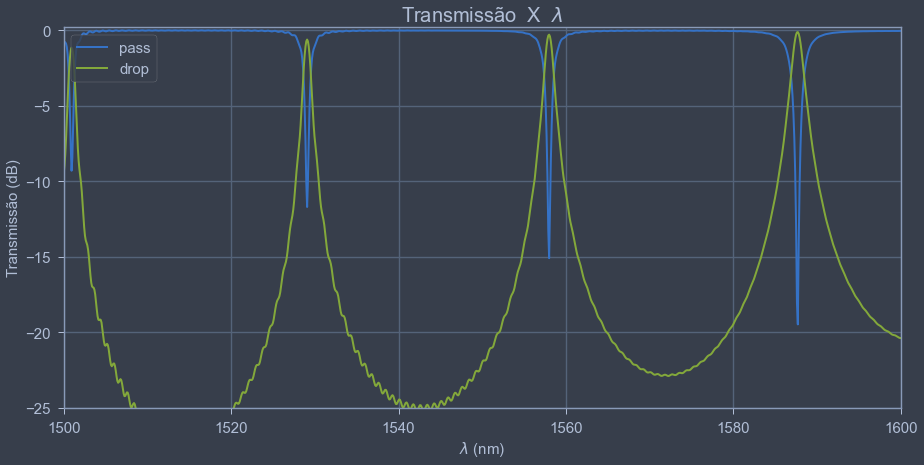

In [8]:
plt.rcParams["figure.figsize"] =(15,7)
Tpass = mode.getresult('pass','T')
x = Tpass['lambda']*1e9
Tpass = Tpass['T']

Tdrop = mode.getresult('drop','T')
Tdrop = Tdrop['T']

plt.plot(x,10*np.log10(Tpass),linewidth=2)
plt.plot(x,10*np.log10(np.abs(Tdrop)),linewidth=2)

plt.xlim(1500,1600)
plt.ylim(-25,0.2)
plt.legend(['pass','drop'],loc='upper left',fontsize =15)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Transmissão (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title(r'Transmissão  X  $\lambda$',fontsize =20)

Text(0.5, 1.0, 'Insertion Loss  X  $\\lambda$')

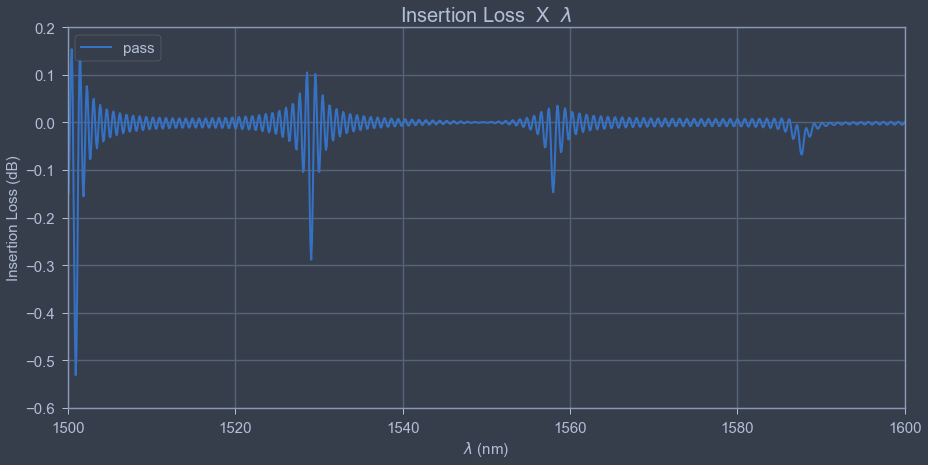

In [10]:
plt.rcParams["figure.figsize"] =(15,7)
Tpass = mode.getresult('pass','T')
x = Tpass['lambda']*1e9
Tpass = Tpass['T']

Tdrop = mode.getresult('drop','T')
Tdrop = Tdrop['T']


plt.plot(x,10*np.log10((Tpass+np.abs(Tdrop))),linewidth=2)

plt.xlim(1500,1600)
plt.ylim(-0.6,0.2)
plt.legend(['pass','drop'],loc='upper left',fontsize =15)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Insertion Loss (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title(r'Insertion Loss  X  $\lambda$',fontsize =20)

Text(0.5, 1.0, 'Transmissão  X  $\\lambda$')

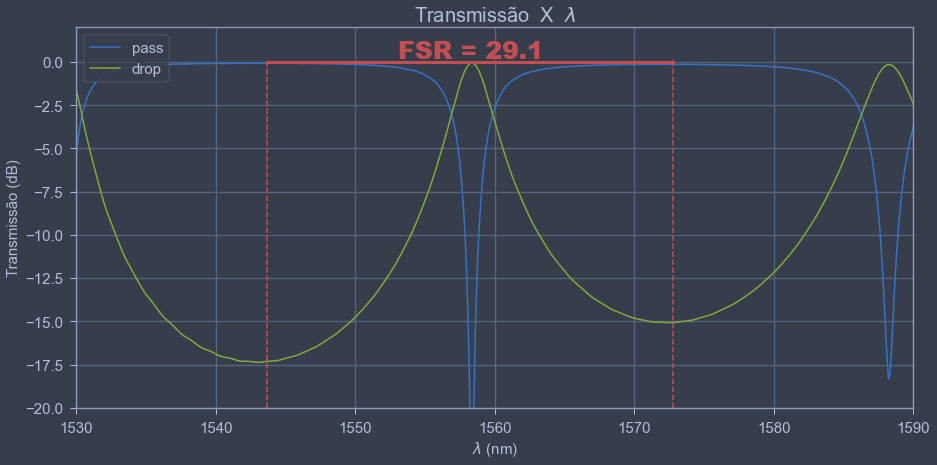

In [31]:
plt.rcParams["figure.figsize"] =(15,7)
Tpass = mode.getresult('pass','T')
x = Tpass['lambda']*1e9
Tpass = Tpass['T']

Tdrop = mode.getresult('drop','T')
Tdrop = Tdrop['T']

plt.plot(x,10*np.log10(Tpass))
plt.plot(x,10*np.log10(np.abs(Tdrop)))
plt.plot([1543.7,1572.8],[-0,-0],linewidth=3)
plt.text(1553.1,0.2,'FSR = 29.1',color='r',weight='black',fontsize =25)
plt.axvline(x=1543.7,color='r',linestyle="--",ymax = 0.92)
plt.axvline(x=1572.8,color='r',linestyle="--",ymax = 0.92)
plt.xlim(1530,1590)
plt.ylim(-20,2)
plt.legend(['pass','drop'],loc='upper left',fontsize =15)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Transmissão (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title(r'Transmissão  X  $\lambda$',fontsize =20)

Text(0.5, 1.0, 'Transmissão  X  $\\lambda$')

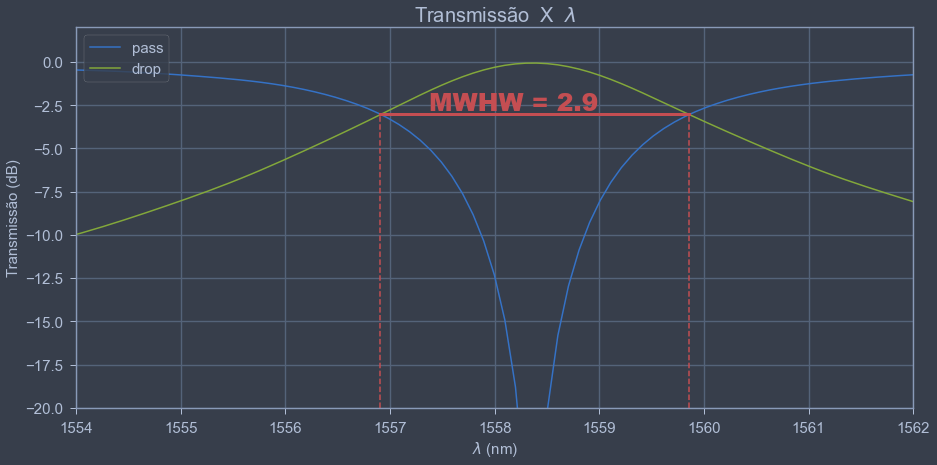

In [43]:
plt.rcParams["figure.figsize"] =(15,7)
Tpass = mode.getresult('pass','T')
x = Tpass['lambda']*1e9
Tpass = Tpass['T']

Tdrop = mode.getresult('drop','T')
Tdrop = Tdrop['T']

plt.plot(x,10*np.log10(Tpass))
plt.plot(x,10*np.log10(np.abs(Tdrop)))
plt.plot([1556.9,1559.86],[-3,-3],linewidth=3)
plt.text(1557.37,-2.8,'MWHW = 2.9',color='r',weight='black',fontsize =25)
plt.axvline(x=1559.86,color='r',linestyle="--",ymax = 0.77)
plt.axvline(x=1556.9,color='r',linestyle="--",ymax = 0.77)
plt.xlim(1554,1562)
plt.ylim(-20,2)
plt.legend(['pass','drop'],loc='upper left',fontsize =15)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Transmissão (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title(r'Transmissão  X  $\lambda$',fontsize =20)

Text(0.5, 1.0, 'Sweep do comprimento de acoplamento')

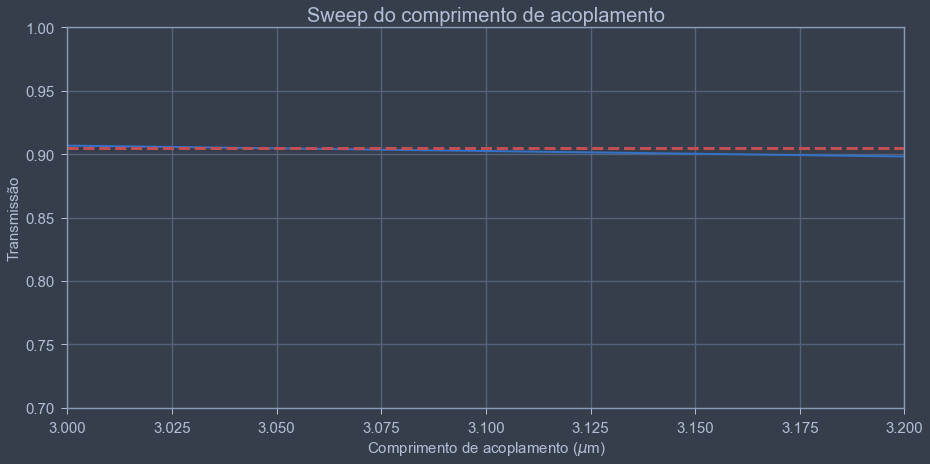

In [275]:
plt.rcParams["figure.figsize"] =(15,7)
resultados = mode.getsweepresult('sweep','new_result')

x = resultados['new_parameter']
x= x[0,:]
y = resultados['T']
y = y[113,:] 

plt.plot(x*1e6,y,linewidth=2)
plt.xlim(3,3.2)
plt.ylim(0.7,1)
#plt.legend(['pass','drop'],loc='upper left',fontsize =15)
plt.axhline(y=0.9047130574419678,color='r',linestyle="--",linewidth=3)
#plt.text(3.5,0.91,'r ideal = 0.951',color='r',weight='black',fontsize =25)
plt.xlabel(r'Comprimento de acoplamento ($\mu$m)',fontsize =15)
plt.ylabel(r'Transmissão',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title(r'Sweep do comprimento de acoplamento',fontsize =20)

In [72]:
inter = lumapi.INTERCONNECT(filename= 'anelinter.icp')

(-30.0, 0.2)

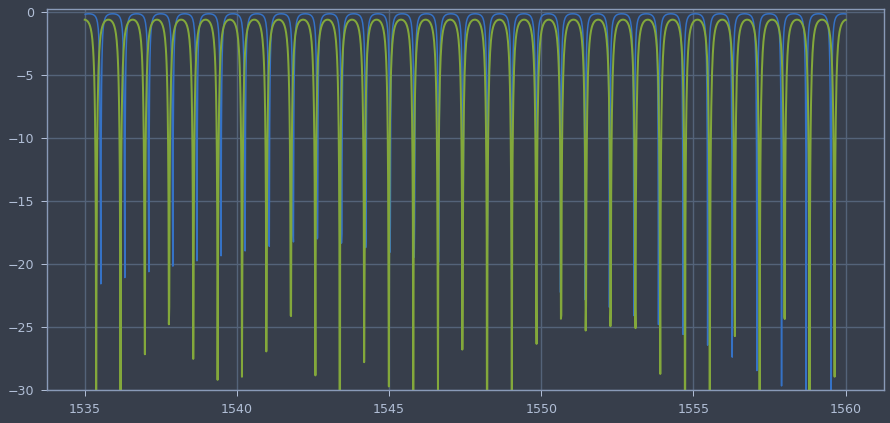

In [84]:

tpass = inter.getresult('ONA_1','input 1/mode 1/gain')
tdrop = inter.getresult('ONA_1','input 2/mode 1/gain')
plt.plot(tpass['wavelength']*1e9,tpass['TE gain (dB)'])
#plt.plot(tdrop['wavelength']*1e9,tdrop['TE gain (dB)'])
plt.plot(comprimento*1e9,10*np.log10(Tpteo),linewidth=2)
#plt.plot(comprimento*1e9,10*np.log10(Tdteo),linewidth=2)
plt.ylim(-30,0.2)